### Importing NLTK Packages

In [1]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd

### Function to tokenize string into the list of words

In [2]:
def tokenize_string(line):
    # Word_tokensize function split the string on the 
    # basis of spaces and returns a list of words
    return word_tokenize(line)

### Function to remove all the English stopword from the given list of words

In [3]:
def remove_stopwords(line):
    #Iterates over the list of words and keep only those words which are not part of English stopwords Set
    result = [word for word in line if word not in stopwords.words('english')]
    return result

### Function to update dictionary which maintains unique word count
This function checks if word already exist in our dictionary.If the word exist then it increase it count otherwise it creates its new entry and initialize it with 1

In [4]:
def update_dictionary(dict,line):
    for word in line:
        
        #Removes any punctuation or special characters from the String
        alphanumeric_word = ''.join(c for c in word if c.isalnum())
        
        #Checks if word already exist in the dictionary then it increment its count otherwise creates a new entry
        if len(alphanumeric_word) > 0 and alphanumeric_word in dict:
            dict[alphanumeric_word] += 1
        elif len(alphanumeric_word) > 0:
            dict[alphanumeric_word] = 1
    
    return dict

### Reading the input file and converting text into wordcount dictionary

In [5]:
#Initializing an empty Dictionary
word_count = dict()

In [6]:
#Opening and Reading the text file line by line
with open('random_text.txt') as text:
    line = text.readline()
    while line:
        #If the line is an empty String then skipping that line
        if len(line.strip()) > 0:
            
            #Lower the String, tokenize the String and then removes all stopwords
            words = remove_stopwords(tokenize_string(line.lower()))
            
            #Updates our word count dictionary
            word_count = update_dictionary(word_count,words)
        line = text.readline()

### Sorting the dictionary in the descending order
We are Sorting the word count dictionary based on our value which is our word frequency. To get the most occurring words, we sort the dictionary in descending order

In [7]:
#Sorting the word count dictionary in descending order on the bases of word frequency
sorted_word_count = {word:word_count[word] for word in sorted(word_count, key=word_count.get, reverse=True)}

#Printing the Output of Unique Words
print('Total Number of Unique Words: {}\n'.format(len(sorted_word_count.keys())))
pd.Series(sorted_word_count,name='Word_Frequency')

Total Number of Unique Words: 148



sed          12
ante          9
eu            9
sit           8
amet          8
             ..
dictumst      1
proin         1
nibh          1
vulputate     1
dictum        1
Name: Word_Frequency, Length: 148, dtype: int64

### Extracting top 5 most frequent words from the sorted wordcount dictionary

In [8]:
#Extracting top 5 most occuring words from the already sorted word count dictionary
top_5_words = {word: sorted_word_count[word] for word in dict(list(sorted_word_count.items())[:5])}

#Print the Output for Top 5 Most Occuring words
print('Top 5 most frequent occurring words are:\n')
pd.Series(top_5_words,name='Word_Frequency')

Top 5 most frequent occurring words are:



sed     12
ante     9
eu       9
sit      8
amet     8
Name: Word_Frequency, dtype: int64

### Plotting the top 5 most frequent words as a Bar plot

In [9]:
import matplotlib.pyplot as plt

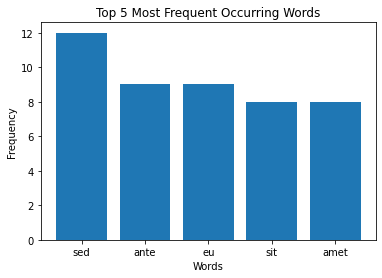

In [10]:
plt.bar(top_5_words.keys(),top_5_words.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 5 Most Frequent Occurring Words')
plt.show()